In [51]:
# Importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy import units as u
from datetime import datetime,timedelta
from astropy.coordinates import solar_system_ephemeris, EarthLocation, get_sun

<div class="alert alert-block alert-success">
<b> Key Question </b> 
Now that we can position stars on the celestial sphere, what effects do we need to account for?
</div>

## Precession of the Earth's rotational axis

The Earth's rotational axis precesses around it's orbital axis with a period of 26,000 years, with the angle between the rotational axis and orbital axis being 23.6$^{\rm o}$. This causes a very slow shift in the positions of the stars, and is one of the reasons a reference epoch for coordinates is specified.

Consider the diagram below. Right now, the Celestial North Pole is pointing approximately towards Polaris. However, in 13,000 years, the NCP will be pointing away from Polaris, meaning it will no longer be the North star.

![Celestial Sphere](Images/Precession.png)


## Annual Aberration

Consider a star which is on the ecliptic. If we were stationary (or on the sun), then we would have to point our telescope at an angle of 

$$
\tan\theta=\frac{u_{\rm y}}{u_{\rm x}}
$$

where $u_{\rm y}$ is the velocity component of the photon coming from the star in the y-direction, and $u_{\rm x}$ in the x-direction. Now, the consider an observer on the Earth, moving with velocity **v**=$v_{\rm x}+v_{\rm y}$.

![Aberration](Images/Aberration_1_alternative.png)

In the primed frame, the photon will have velocity components $u'_{\rm x} = u_{\rm x}+v_{\rm x}$ and $u'_{\rm y} = u_{\rm y}+u_{\rm y}$. As such, the angle the telescope will need to be pointed at, $\phi$, is

$$
\tan \phi=\frac{u_{\rm y}+v_{\rm y}}{u_{\rm x}+v_{\rm x}}=\frac{\sin \theta +v_{\rm y}/c}{\cos \theta+v_{\rm x}/c}
$$

Now take the extreme example where $\theta=90^{\rm o}$, and the Earth is moving with velocity v=30 km/s in the x direction. The above expression becomes

$$
\tan \phi=\frac{c}{v}
$$

The difference between $\theta$ and $\phi$ (that is, the offset we need to include when pointing our telescope) is then

$$
\tan(\theta-\phi)=\frac{v}{c}
$$

The Earth's velocity is $v= \textbf{v}=30$ km/s, and so the telescope must point with an angle offset of 20.6".

Now consider this effect over one year. When the velocity of Earth is perpendicular to the incoming star light (points D and B), we see a maximum of this effect, while when the velocity is parallel to the photon's velocity, we see no effect (A/C). This means over the year, the star moves along a line on the ecliptic with a maximum displacement of 41.2".

![Aberration_2](Images/Aberration_2_alternative.png)


Stars off the ecliptic by an angle $\theta$ become more complex to deal with, and at maximum gain an additional angular component perpendicular to the ecliptic, causing them to trace out ellipses in the night sky. Stars at 90 degrees to  the ecliptic trace out a circle.

Our treatment above is purely classical, but suffices for our purposes. The full treatment requires special relativity, and this annual aberration caused significant confusion up until special relativity was proposed (I highly recommend reading the wikipedia article on this if you're interested, but it's not necessary for the course).

## Airmass & Extinction

The Earth's atmosphere absorbs light, and the amount of light absorbed depends on the angle of the star above the horizon. If we didn't correct this effect, observations of objects at different times of night would give different magnitudes! We'll see how to correct for extinction below, but first we need to work out how extinction depends on the angle of the star above the horizon.

We can derive a simple equation for the extinction correction by assuming the atmosphere is a series of thin plane-parallel layers. The figure below shows such a layer, of thickness dx at an altitude x. The path length through the layer for light from a star at a zenith distance $z$ is equal to $dx/cosz=dxsecz$. The term $secz$ is known as the airmass, and is sometimes given the symbol X. 

At the zenith, $X=secz=1$, and this increases to a value of 2 at a zenith distance of 60$^{\rm o}$. Note that the approximation of the atmosphere as being plane-parallel breaks down at larger zenith distances. Due to the amount of extinction, it's a bad idea to observe astronomical objects this low, so we shall not worry about the curvature of the atmosphere here.

![Aberration_2](Images/Airmass.png)

If the monochromatic flux from an object incident on the layer is $F_{\lambda}$ then the flux absorbed by the layer $dF_{\lambda}$ will be proportional to both $F_{\lambda}$ and the path length through the layer. Therefore:
$$
dF_{\lambda}=−\alpha_\lambda F_{\lambda} \sec z dx,
$$

where the constant of proportionality, $\alpha_\lambda$ is known as the absorption coefficient, with units of m$^{-1}$. The absorption coefficient is a function of the composition and density of the atmosphere, and hence the altitude of the layer, x. We can re-arrange this equation (and drop the $\lambda$ subscripts for clarity) to give
$$
\frac{dF}{F}=−\sec z \: \alpha \: dx.
$$
Integrating the equation above for x values from the top of the atmosphere, t, to the bottom b, we obtain
$$
\int ^b _t \frac{dF}{F} =−\sec z \: \int ^b _t \alpha \: dx.
$$

Hence
$$
\frac{F_b}{F_t}=\frac{F}{F_0}=\exp\left(−\sec z \: \int ^b _t \alpha \: dx\right)
$$
We'll be coming back to this equation in a later lecture, but it's useful to derive it now.

## Equation of Time

Consider again the position of the Sun on the celestial sphere. If we used a sundial to time how long it took between consecutive passes of the Sun through the meridian, and also measured out 24 hours, what would it look like? If the orbit of the Earth were perfectly circular and the rotational axis of the Earth was perpendicular to the orbital plane, it should always be 0.

However, our orbit is elliptical and the Earth's rrotational axis is not perpendicular to the orbital plane (obliquity). As such, the time between transits (Apparent Solar Time) is different to the time measured using a stop watch (Mean Solar Time), as shown in the plot below. This correction is known as the Equation of Time.

This means if you were timing your days using the Sun, you would be slower in June and November than if you used a stopwatch, and faster in January and August.

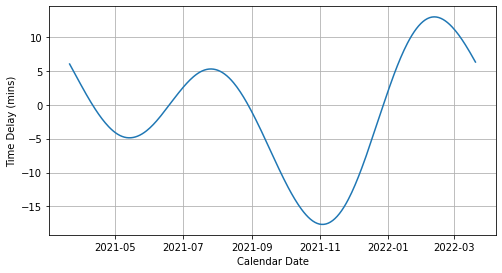

In [62]:
base = datetime(2022,3,20,12,0,0,0)
times = [base - timedelta(days=x) for x in range(365)]
ts = Time(times,format='datetime',scale='utc') #Convering the MJDs to a Time format which Astropy can read.
with solar_system_ephemeris.set('builtin'):
    sun = get_sun(ts) # Get the location of the Sun
EoT = (sun.ra-ts.sidereal_time("mean","greenwich"))
EoT[EoT<-300*u.deg]=EoT[EoT<-300*u.deg]+360*u.deg

plt.figure(figsize=(8,4.2))
plt.subplot(111)
plt.grid(True)
plt.plot(times,EoT.hour*60)
plt.xlabel("Calendar Date")
plt.ylabel("Time Delay (mins)")
plt.savefig("Images/EoT.svg")
plt.show()

## Proper Motion


Next, we consider the effects of a stars proper motion across the night sky. Consider an observer, and a star with velocity **v** as shown below. In spherical coordinates, this velocity has two components - a radial component, $v_{\rm r}$, and an angular component $v_{\rm \theta}$. If we're tracking a stars position across the celestial sphere, then we are only measuring $v_{\rm \theta}$, which is known as the **transverse velocity**. Now, consider a time interval $\Delta t$. Over this time, an object will have moved a distance $\Delta d$ relative to our line of sight
$$
 \Delta d = v_{\rm \theta} \Delta t.
$$
If the distance, r, to the object is known, then the angular change across the celestial sphere is given by
$$
 \Delta \theta = \frac{\Delta d}{r} = \frac{v_{\rm \theta} \Delta t}{r}.
$$
The **proper motion** of an object, that is the change of this angle with time, is then given by
$$
 \mu \equiv \frac{d \theta}{d t} = \frac{v_{\rm \theta}}{r}.
$$

So, in practice, what is the expression for $\theta$? Consider a star which moves between point A and B on the celestial sphere, as shown below.

![Celestial Sphere_RA_Dec](Images/Proper_motion.png)

First, we can write the expression:
$$
    \frac{\sin{\Delta\theta}}{\sin{\Delta\alpha}} = \frac{\sin(90^{\rm o}-(\delta+\Delta\delta))}{\sin{\phi}}
$$
This can  be rewritten as 
$$
    \sin\Delta\alpha \cos(\delta+\Delta\delta) = \sin\Delta\theta \sin\phi.
$$
Now using the small angle approximation for anything with $\Delta\delta$ in it (which is likely true for objects moving across the night sky!), we get
$$
    \Delta\alpha \cos(\delta+\Delta\delta) = \Delta\theta \sin\phi.
$$
$\cos(\delta+\Delta\delta)$ can be Taylor expanded around $\Delta\delta\sim0$ to give
$$
    \cos(\delta+\Delta\delta) = \cos(\delta)-\Delta\delta\sin(\delta)+... \approx \cos(\delta)
$$
which then leaves us with 
$$
    \Delta\alpha = \Delta\theta \frac{\sin\phi}{\cos(\delta)}.
$$
Now, in order to solve for $\Delta\theta$ and remove $\phi$, we need to use the law of cosines:
$$
\cos[90^{\rm o}-(\delta+\Delta\delta)]=\cos(90^{\rm o}-\delta)\cos(\Delta\theta)+\sin(90^{\rm o}-\delta)\sin(\Delta\theta)\cos(\phi)
$$
Which, by substituing $\cos[90^{\rm o}-(\delta+\Delta\delta)]=\sin(\delta+\Delta\delta)=\sin(\delta)\cos(\Delta\delta)+\cos(\delta)\sin(\Delta\delta)$ and using the small angle approximation becomes
$$
    \Delta\delta=\Delta\theta\cos\phi
$$
Cominbing this with the equation above gives
$$
    (\Delta\theta)^2=(\Delta\delta)^2+(\Delta\alpha\cos\delta)^2
$$
This gives a very handy expression for calculating the angular separation between two objects.